In [6]:
import pandas as pd
import numpy as np

data = pd.read_excel("D:\Indian Unicorn startups 2023 updated1.xlsx")  # Adjust filename if needed
print(data)

                         Company        Sector                    Sector1  \
0                       Flipkart  E - Commerce                   Commerce   
1                          BYJUS        Edtech                        NaN   
2                          PayTM       Fintech          Payments & Wallet   
3                       PhonePe^       Fintech                   Payments   
4                          Swigg      Foodtech                        NaN   
..                           ...           ...                        ...   
97              Amagi Media Labs          SaaS        Local Ads Targeting   
98      Oxyzo Financial Services       Fintech  Marketplace - SME Lending   
99   Open Financial Technologies       Fintech                   Neo Bank   
100                   Leadsquare          SaaS                        CRM   
101                      Blinkit  E - Commerce       Commerce - Groceries   

     Entry_Valuation^^ ($B)  Valuation ($B)      Entry Entry_Month  \
0    

In [7]:
print(data.head())  # Preview the first 5 rows

    Company        Sector            Sector1  Entry_Valuation^^ ($B)  \
0  Flipkart  E - Commerce           Commerce                     1.0   
1     BYJUS        Edtech                NaN                     1.0   
2     PayTM       Fintech  Payments & Wallet                     1.7   
3  PhonePe^       Fintech           Payments                     5.5   
4     Swigg      Foodtech                NaN                     1.4   

   Valuation ($B)      Entry Entry_Month  Entry_Year             Location  \
0            37.6 2012-02-01    February        2012  Bangalore/Singapore   
1            22.0 2018-01-01     January        2018            Bangalore   
2            16.0 2015-02-01    February        2015                Noida   
3            12.0 2020-12-01    December        2020            Bangalore   
4            10.7 2018-06-01        June        2018            Bangalore   

   No_of_Location                                   Select_Investors  \
0               2    Accel, Tige

In [8]:
print(data.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Company                 102 non-null    object        
 1   Sector                  102 non-null    object        
 2   Sector1                 83 non-null     object        
 3   Entry_Valuation^^ ($B)  102 non-null    float64       
 4   Valuation ($B)          102 non-null    float64       
 5   Entry                   102 non-null    datetime64[ns]
 6   Entry_Month             102 non-null    object        
 7   Entry_Year              102 non-null    int64         
 8   Location                102 non-null    object        
 9   No_of_Location          102 non-null    int64         
 10  Select_Investors        102 non-null    object        
 11  No of invester          102 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object

In [9]:
print(data.describe())  # Summary statistics for numeric columns

       Entry_Valuation^^ ($B)  Valuation ($B)                          Entry  \
count              102.000000      102.000000                            102   
mean                 1.547549        3.398020  2020-06-19 11:45:52.941176576   
min                  1.000000        0.568000            2011-09-01 00:00:00   
25%                  1.000000        1.200000            2019-07-16 12:00:00   
50%                  1.200000        1.850000            2021-05-01 00:00:00   
75%                  1.582500        3.475000            2021-11-01 00:00:00   
max                 10.000000       37.600000            2022-09-01 00:00:00   
std                  1.138013        4.710657                            NaN   

        Entry_Year  No_of_Location  No of invester  
count   102.000000      102.000000      102.000000  
mean   2020.029412        1.205882        4.294118  
min    2011.000000        1.000000        2.000000  
25%    2019.000000        1.000000        4.000000  
50%    2021.00

In [10]:
print(data.isnull().sum())  # Check for missing values

Company                    0
Sector                     0
Sector1                   19
Entry_Valuation^^ ($B)     0
Valuation ($B)             0
Entry                      0
Entry_Month                0
Entry_Year                 0
Location                   0
No_of_Location             0
Select_Investors           0
No of invester             0
dtype: int64


In [11]:
data.rename(columns={'Entry_Valuation^^ ($B)': 'Entry_Valuation', 'No of invester': 'No_of_Investors'}, inplace=True)
data.fillna(value={'No_of_Investors': 0}, inplace=True)  # Example for filling missing investor count
print(data)

                         Company        Sector                    Sector1  \
0                       Flipkart  E - Commerce                   Commerce   
1                          BYJUS        Edtech                        NaN   
2                          PayTM       Fintech          Payments & Wallet   
3                       PhonePe^       Fintech                   Payments   
4                          Swigg      Foodtech                        NaN   
..                           ...           ...                        ...   
97              Amagi Media Labs          SaaS        Local Ads Targeting   
98      Oxyzo Financial Services       Fintech  Marketplace - SME Lending   
99   Open Financial Technologies       Fintech                   Neo Bank   
100                   Leadsquare          SaaS                        CRM   
101                      Blinkit  E - Commerce       Commerce - Groceries   

     Entry_Valuation  Valuation ($B)      Entry Entry_Month  Entry_Year  \


In [12]:
data['Entry'] = pd.to_datetime(data['Entry'])

In [21]:
# Group by 'Sector' and count the number of companies in each sector
gp = data.groupby('Sector').agg({'Company': 'count'})

# Sort the result by the count in descending order

print(gp.sort_values(by='Company', ascending=False).head(5)) # Display the top 5 sectors by company count

              Company
Sector               
Fintech            17
SaaS               16
E - Commerce       13
Marketplace         9
Edtech              7


In [23]:
gp = data.groupby('Location').agg({'Company': 'count'})

# Sort the result by the count in descending order

print(gp.sort_values(by = 'Company', ascending=False).head(5)) #Display the top 5 Location by company count

           Company
Location          
Bangalore       34
Gurgaon         14
Mumbai          12
Delhi            7
Pune             4


In [28]:
print(np.isinf(data['Valuation ($B)']).sum())

0


In [29]:
data['Valuation ($B)'] = data['Valuation ($B)'].replace([np.inf, -np.inf], np.nan)

In [31]:
data.dropna(subset=['Valuation ($B)'], inplace=True)

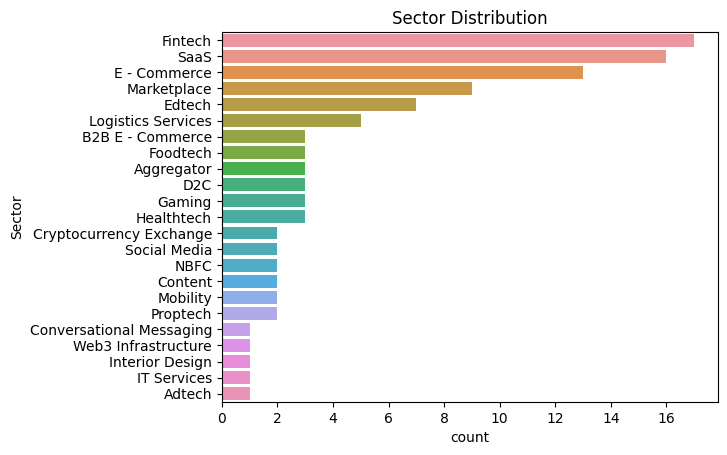

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.histplot(data['Valuation ($B)'], bins=20)
# plt.title('Valuation Distribution')
# plt.show()

sns.countplot(y=data['Sector'], order=data['Sector'].value_counts().index)
plt.title('Sector Distribution')
plt.show()

C:\Users\amank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


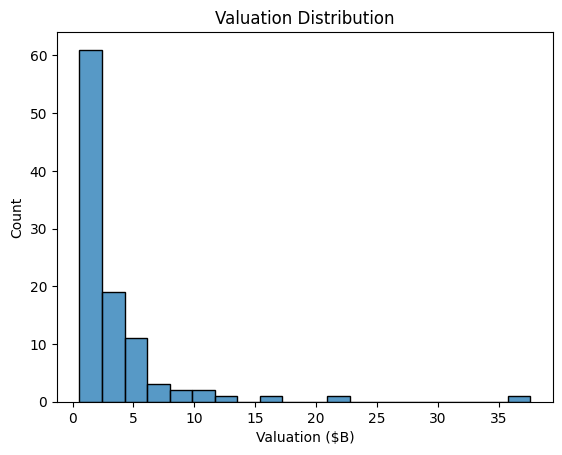

In [41]:
sns.histplot(data['Valuation ($B)'], bins=20)
plt.title('Valuation Distribution')
plt.show()

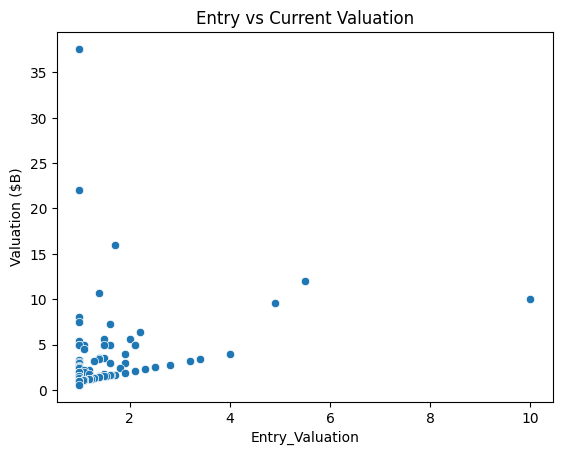

In [42]:
sns.scatterplot(x='Entry_Valuation', y='Valuation ($B)', data=data)
plt.title('Entry vs Current Valuation')
plt.show()

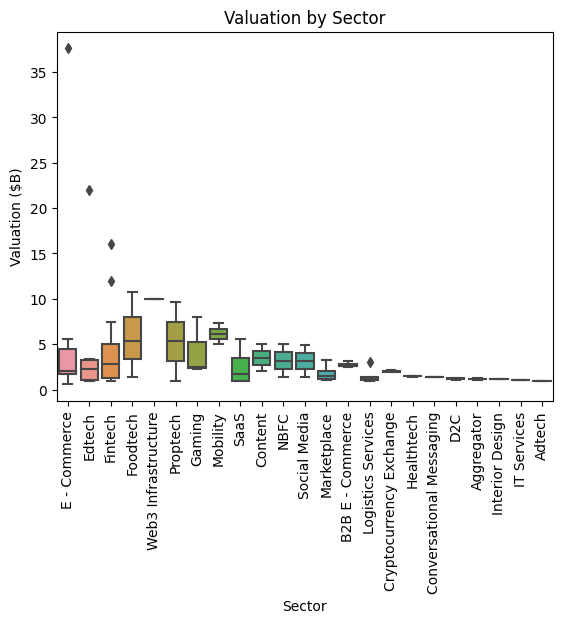

In [43]:
sns.boxplot(x='Sector', y='Valuation ($B)', data=data)
plt.xticks(rotation=90)
plt.title('Valuation by Sector')
plt.show()

C:\Users\amank\AppData\Local\Temp\ipykernel_20512\3994608262.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Entry_Year', y='Valuation ($B)', data=data, ci=None)
C:\Users\amank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


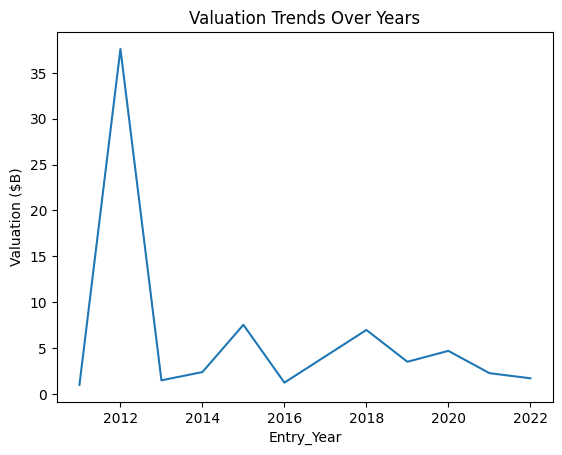

In [44]:
sns.lineplot(x='Entry_Year', y='Valuation ($B)', data=data, ci=None)
plt.title('Valuation Trends Over Years')
plt.show()

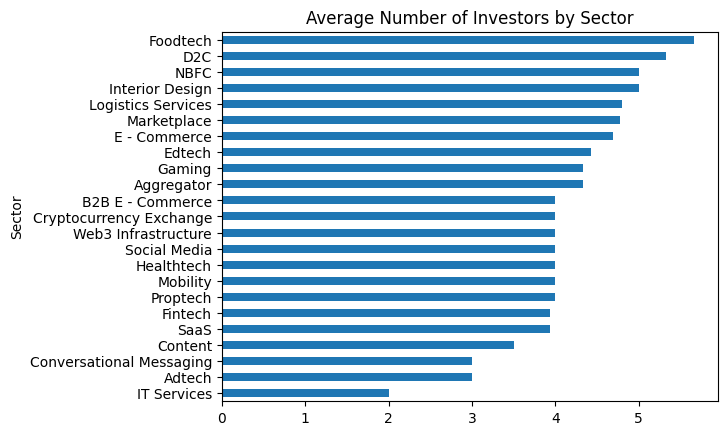

In [45]:
data.groupby('Sector')['No_of_Investors'].mean().sort_values().plot(kind='barh')
plt.title('Average Number of Investors by Sector')
plt.show()